In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [85]:
df = pd.read_csv("House Price Prediction Dataset.csv")
print(df)
df.head()

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [86]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [87]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [88]:
df["Area"].fillna(df["Area"].mean())
df["Bedrooms"].fillna(df["Bedrooms"].mean())
df["Garage"].fillna(df["Garage"].mode()[0])
df["Location"].fillna(df["Location"].mode()[0])
df["Condition"].fillna(df["Condition"].mode()[0])


0       Excellent
1       Excellent
2            Good
3            Fair
4            Fair
          ...    
1995         Poor
1996         Poor
1997         Poor
1998    Excellent
1999         Fair
Name: Condition, Length: 2000, dtype: object

In [89]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [90]:
df.notnull().sum()

Id           2000
Area         2000
Bedrooms     2000
Bathrooms    2000
Floors       2000
YearBuilt    2000
Location     2000
Condition    2000
Garage       2000
Price        2000
dtype: int64

In [91]:
le = LabelEncoder()

df['Area'] = le.fit_transform(df['Area'])
df['Bedrooms'] = le.fit_transform(df['Bedrooms'])
df['Bathrooms'] = le.fit_transform(df['Bathrooms'])


In [92]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,297,4,3,3,1970,Downtown,Excellent,No,149919
1,2,1357,4,3,3,1958,Downtown,Excellent,No,424998
2,3,1098,1,1,3,1938,Downtown,Good,No,266746
3,4,157,3,1,2,1902,Suburban,Fair,Yes,244020
4,5,1585,0,3,2,1975,Downtown,Fair,Yes,636056


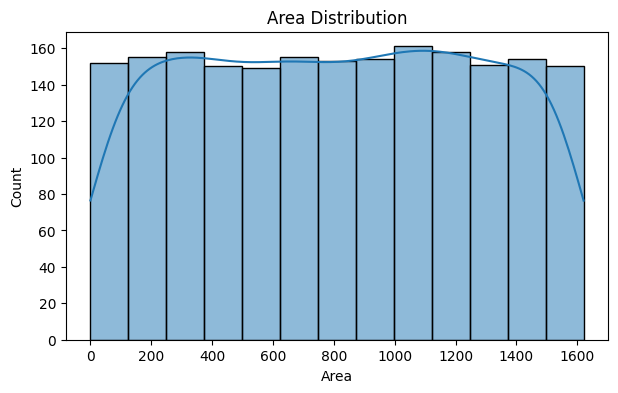

In [93]:
plt.figure(figsize=(7,4))
sns.histplot(df['Area'], kde=True)
plt.title("Area Distribution")
plt.show()

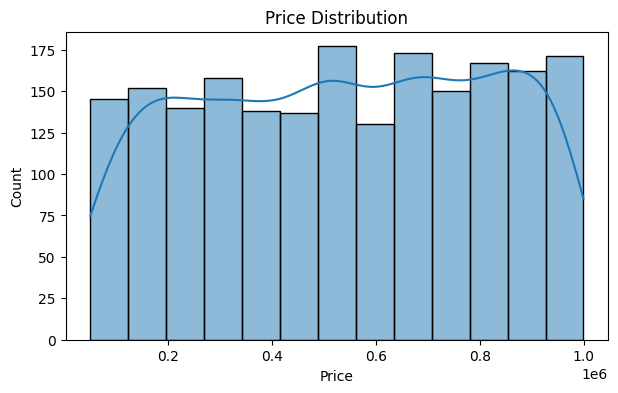

In [94]:
plt.figure(figsize=(7,4))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

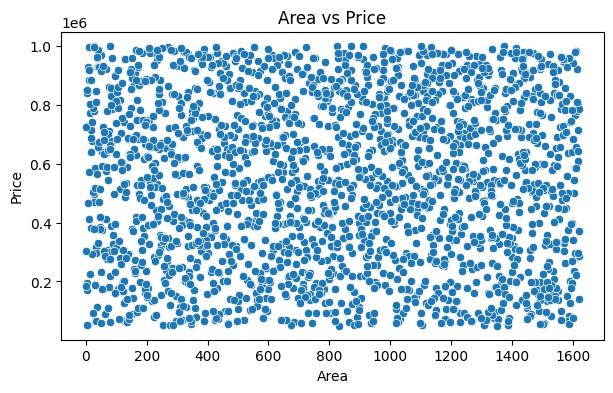

In [95]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Area vs Price")
plt.show()

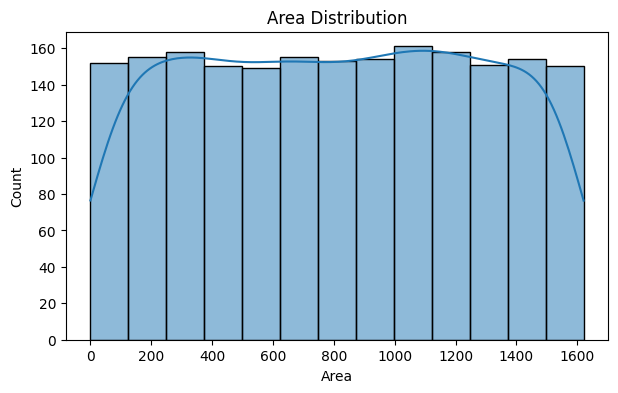

In [96]:
plt.figure(figsize=(7,4))
sns.histplot(df['Area'], kde=True)
plt.title("Area Distribution")
plt.show()


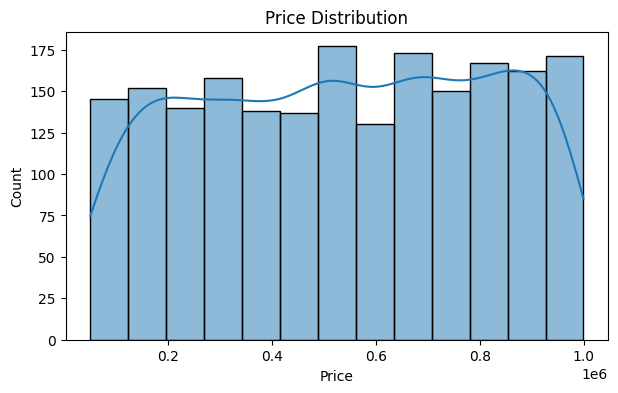

In [97]:
plt.figure(figsize=(7,4))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

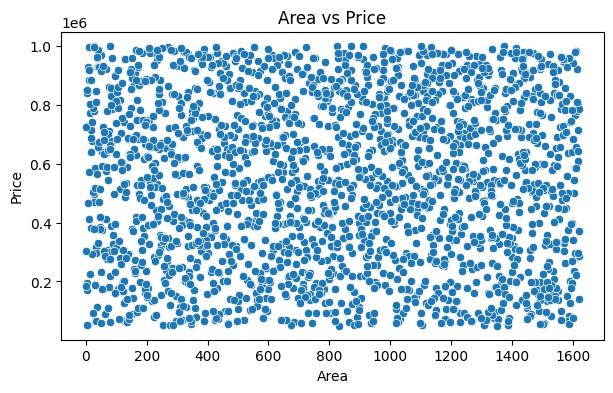

In [98]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Area vs Price")
plt.show()

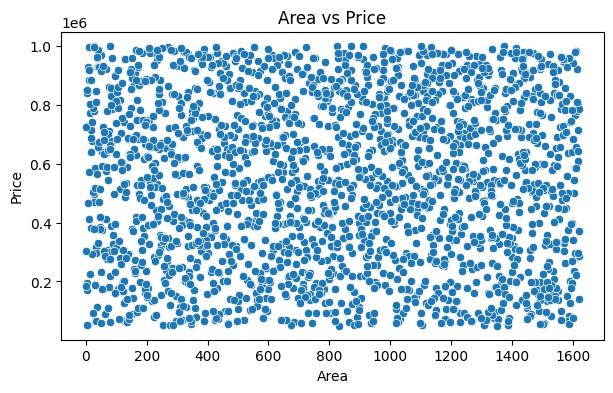

In [99]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Area vs Price")
plt.show()


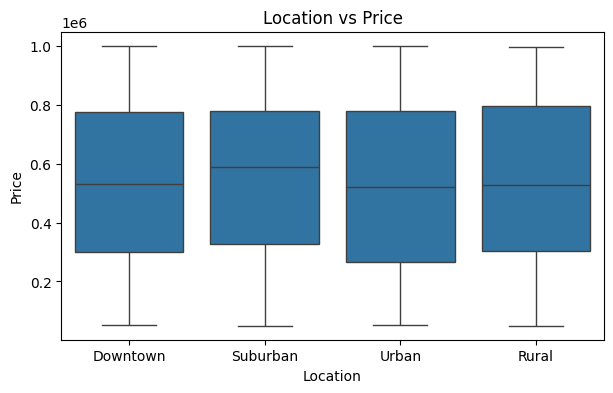

In [100]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Location', y='Price', data=df)
plt.title("Location vs Price")
plt.show()

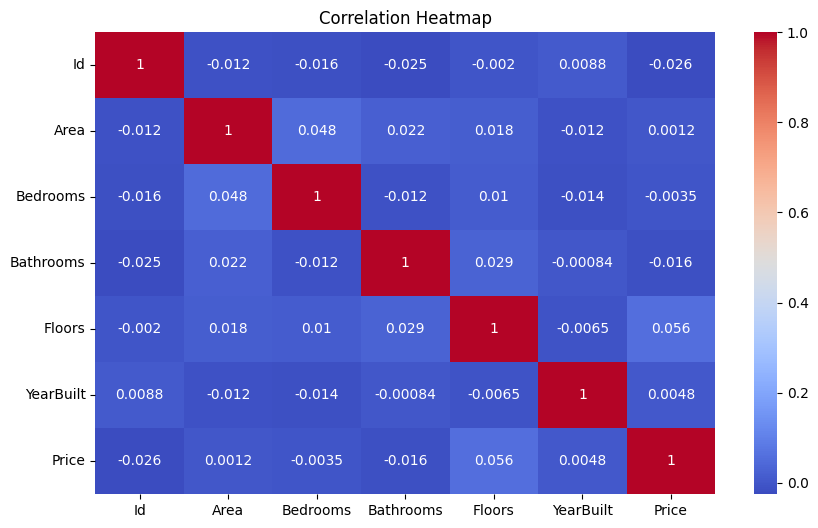

In [104]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

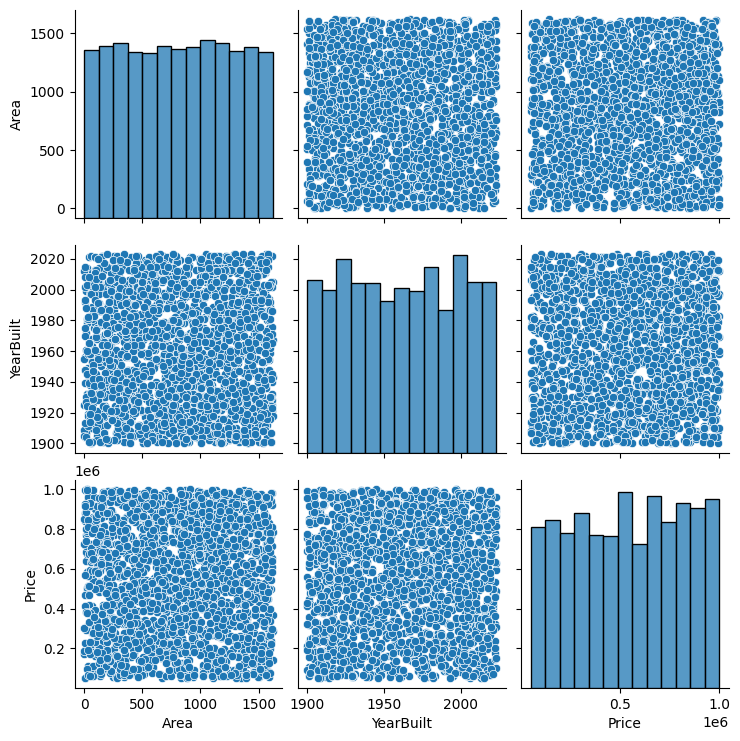

In [106]:
sns.pairplot(df[['Area','YearBuilt','Location','Condition','Garage','Price']])
plt.show()

In [109]:
X = df[['Area','Location','Condition']]
y = df['Price']


In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [115]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [116]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
y_pred = model.predict(X_test)

In [118]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


MAE : 242867.44926338625
MSE : 78279764120.86243
RMSE: 279785.21069002635
R²  : -0.006181784611834162


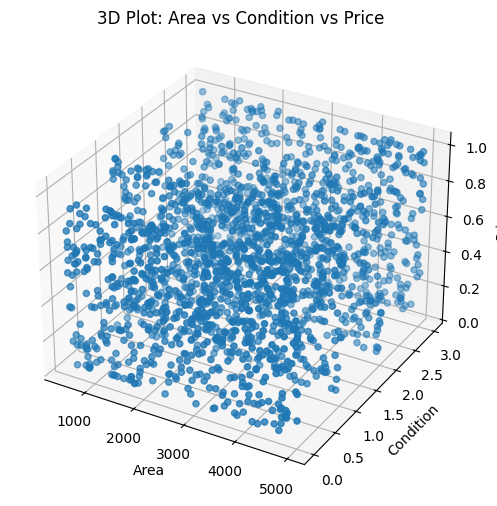

In [121]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df = df.dropna()

df['Condition'] = df['Condition'].astype('category').cat.codes

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Area'], df['Condition'], df['Price'])

ax.set_xlabel("Area")
ax.set_ylabel("Condition")
ax.set_zlabel("Price")
ax.set_title("3D Plot: Area vs Condition vs Price")

plt.show()

In [122]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Id,-6892.134735
Area,-629.807550
Bedrooms,75.999922
Bathrooms,-10906.548221
Floors,19030.926950
YearBuilt,4192.578243
Location_Rural,782.814737
Location_Suburban,4688.807893
Location_Urban,-5433.722080
Condition_Fair,10605.827753
